In [98]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
init_notebook_mode(connected=True)
import string
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
#Reading data from the files
F1 = pd.read_csv("chefmozaccepts.csv")
F2 = pd.read_csv("chefmozcuisine.csv")
F3 = pd.read_csv("chefmozhours4.csv")
F4 = pd.read_csv("chefmozparking.csv")
F5 = pd.read_csv("usercuisine.csv")
F6 = pd.read_csv("userpayment.csv")
F7 = pd.read_csv("userprofile.csv")
F8 = pd.read_csv("geoplaces2.csv", encoding='latin-1')

T = pd.read_csv("rating_final.csv")

# EDA

### F1-chefmozaccepts.csv

In [5]:
F1.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [6]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
placeID     1314 non-null int64
Rpayment    1314 non-null object
dtypes: int64(1), object(1)
memory usage: 20.6+ KB


Text(0, 0.5, 'Count')

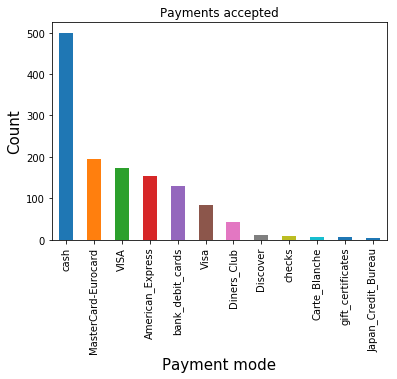

In [9]:
# Visualizing most accepted payments by restaurants
F1_plt = F1.Rpayment.value_counts().plot.bar(title = "Payments accepted")
F1_plt.set_xlabel('Payment mode', size=15)
F1_plt.set_ylabel('Count', size=15)

In [10]:
# Creating dummy variables for different payments
F1_dum = pd.get_dummies(F1,columns=['Rpayment'])
F1_dum = F1_dum.groupby('placeID',as_index=False).sum()
F1_dum.head()

,placeID,Rpayment_American_Express,Rpayment_Carte_Blanche,Rpayment_Diners_Club,Rpayment_Discover,Rpayment_Japan_Credit_Bureau,Rpayment_MasterCard-Eurocard,Rpayment_VISA,Rpayment_Visa,Rpayment_bank_debit_cards,Rpayment_cash,Rpayment_checks,Rpayment_gift_certificates
0,132002,1,0,1,0,0,1,0,1,0,0,0,0
1,132012,1,0,1,0,0,0,0,1,1,0,0,0
2,132019,1,0,1,0,0,1,0,1,0,0,0,0
3,132023,1,0,1,0,1,0,0,0,1,0,0,0
4,132024,1,0,1,0,0,0,0,1,1,0,0,0


### F2 - chefmozcuisine.csv

In [11]:
F2.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [12]:
F2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
placeID     916 non-null int64
Rcuisine    916 non-null object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


Text(0, 0.5, 'Count')

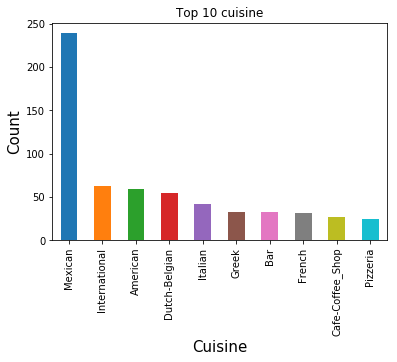

In [13]:
# Visualizing top cuisines offered by the restaurants
F2_plt = F2.Rcuisine.value_counts()[:10].plot.bar(title="Top 10 cuisine")
F2_plt.set_xlabel('Cuisine',size=15)
F2_plt.set_ylabel('Count',size=15)

In [14]:
# Creating dummy variables for different cuisines.
F2_dum = pd.get_dummies(F2,columns=['Rcuisine'])
F2_dum = F2_dum.groupby('placeID',as_index=False).sum()
F2_dum.head()

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,132001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,132004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,132005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### F3 - chefmozhours4.csv

In [15]:
F3.head()

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


In [16]:
F3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
placeID    2339 non-null int64
hours      2339 non-null object
days       2339 non-null object
dtypes: int64(1), object(2)
memory usage: 54.9+ KB


### F4 - chefmozparking.csv

In [17]:
F4.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [18]:
F4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
placeID        702 non-null int64
parking_lot    702 non-null object
dtypes: int64(1), object(1)
memory usage: 11.0+ KB


Text(0, 0.5, 'Count')

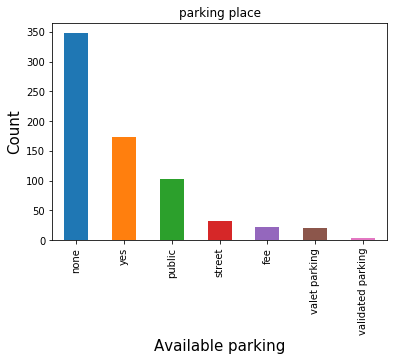

In [19]:
# Visualizing available parking place at the Restaurants
F4_plt = F4.parking_lot.value_counts().plot.bar(title="parking place")
F4_plt.set_xlabel('Available parking',size=15)
F4_plt.set_ylabel('Count',size=15)

In [20]:
# Creating dummy variables for different parking lots.
F4_dum = pd.get_dummies(F4,columns=['parking_lot'])
F4_dum = F4_dum.groupby('placeID',as_index=False).sum()
F4_dum.head()

,placeID,parking_lot_fee,parking_lot_none,parking_lot_public,parking_lot_street,parking_lot_valet parking,parking_lot_validated parking,parking_lot_yes
0,132012,0,0,1,1,0,0,0
1,132023,1,0,1,0,0,0,0
2,132024,0,0,0,1,0,0,0
3,132026,1,0,0,0,0,0,0
4,132030,0,0,0,1,0,0,0


### F5 - usercuisine.csv

In [21]:
F5.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


In [22]:
F5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 2 columns):
userID      330 non-null object
Rcuisine    330 non-null object
dtypes: object(2)
memory usage: 5.2+ KB


Text(0, 0.5, 'count')

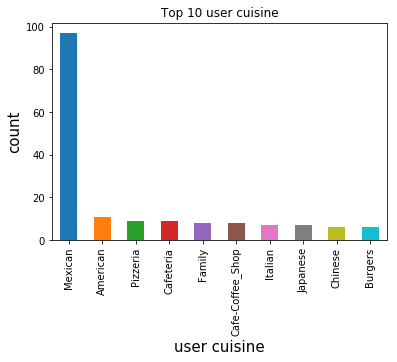

In [23]:
# Top 10 favorite cuisines for the customers
F5_plt = F5.Rcuisine.value_counts()[:10].plot.bar(title="Top 10 user cuisine")
F5_plt.set_xlabel('user cuisine',size=15)
F5_plt.set_ylabel('count',size=15)

In [24]:
# Creating dummy variables for differen usercuisines.
F5_dum = pd.get_dummies(F5,columns=['Rcuisine'])
F5_dum = F5_dum.groupby('userID',as_index=False).sum()
F5_dum.head()

,userID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Australian,Rcuisine_Austrian,Rcuisine_Bagels,Rcuisine_Bakery,...,Rcuisine_Swiss,Rcuisine_Tapas,Rcuisine_Tea_House,Rcuisine_Tex-Mex,Rcuisine_Thai,Rcuisine_Tibetan,Rcuisine_Tunisian,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,U1001,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,U1002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,U1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U1004,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,U1005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### F6 - userpayment.csv

In [25]:
F6.head()

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


In [26]:
F6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
userID      177 non-null object
Upayment    177 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


Text(0, 0.5, 'count')

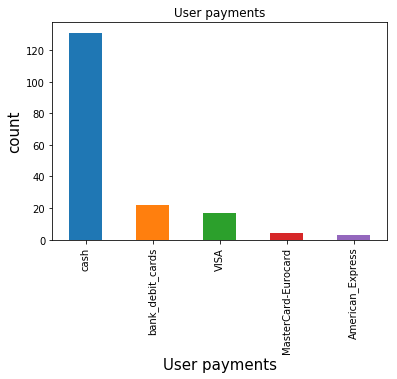

In [27]:
# Top type of payments done by the users
F6_plt=F6.Upayment.value_counts().plot.bar(title="User payments")
F6_plt.set_xlabel('User payments',size=15)
F6_plt.set_ylabel('count',size=15)

In [28]:
# Creating dummy variables for different userpayments.
F6_dum = pd.get_dummies(F6,columns=['Upayment'])
F6_dum =F6_dum.groupby('userID',as_index=False).sum()
F6_dum.head()

,userID,Upayment_American_Express,Upayment_MasterCard-Eurocard,Upayment_VISA,Upayment_bank_debit_cards,Upayment_cash
0,U1001,0,0,0,0,1
1,U1002,0,0,0,0,1
2,U1003,0,0,0,0,1
3,U1004,0,0,0,1,1
4,U1005,0,0,0,0,1


### F7 - userprofile.csv

In [29]:
F7.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [30]:
F7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
userID              138 non-null object
latitude            138 non-null float64
longitude           138 non-null float64
smoker              138 non-null object
drink_level         138 non-null object
dress_preference    138 non-null object
ambience            138 non-null object
transport           138 non-null object
marital_status      138 non-null object
hijos               138 non-null object
birth_year          138 non-null int64
interest            138 non-null object
personality         138 non-null object
religion            138 non-null object
activity            138 non-null object
color               138 non-null object
weight              138 non-null int64
budget              138 non-null object
height              138 non-null float64
dtypes: float64(3), int64(2), object(14)
memory usage: 20.6+ KB


In [31]:
# As data contains unknown value, we are replacing with Nan.
F7_rep = F7.replace('?', np.nan)

In [33]:
# Now we are finding missing value cnt n perct for all variables.
mss = F7_rep.isnull().sum()
columns = F7_rep.columns
percent_missing = F7_rep.isnull().sum() * 100 / len(F7_rep)
missing_value_F7rep = pd.DataFrame({'missing_cnt':mss,'percent_missing': percent_missing})
missing_value_F7rep

,missing_cnt,percent_missing
userID,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
smoker,3,2.173913
drink_level,0,0.000000
dress_preference,5,3.623188
ambience,6,4.347826
transport,7,5.072464
marital_status,4,2.898551
hijos,11,7.971014


In [34]:
# Since the missing value pernt is very low in each variables, we are replacing with mode of that individual column.
for column in F7_rep.columns:
    F7_rep[column].fillna(F7_rep[column].mode()[0], inplace=True)

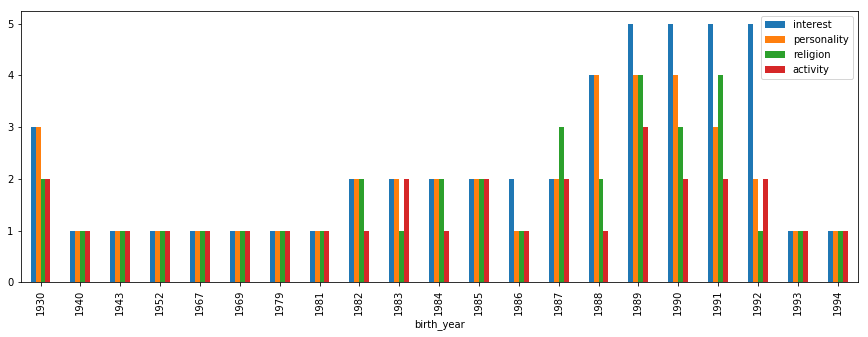

In [35]:
# Plot to visualize user's personal info based on birthyear.
F7repplt = F7_rep.groupby('birth_year')['interest','personality','religion','activity'].nunique().plot.bar(figsize=(15, 5))

In [38]:
# Now performing label encoding to convert char to factors.
F7_char = F7_rep.select_dtypes(include=['object'])
encoder = LabelEncoder()
F7charLE = F7_char.apply(encoder.fit_transform, axis=0)
F7charLE = F7charLE.drop(['userID'],axis=1)
F7charLE[['userID','latitude','longitude','birth_year','weight','height']] = F7_rep[['userID','latitude','longitude','birth_year','weight','height']]
F7charLE.head()

,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,interest,personality,religion,activity,color,budget,userID,latitude,longitude,birth_year,weight,height
0,0,0,2,0,1,1,1,4,3,4,1,0,2,U1001,22.139997,-100.978803,1989,69,1.77
1,0,0,2,0,2,1,1,3,2,0,1,5,1,U1002,22.150087,-100.983325,1990,40,1.87
2,0,2,1,0,2,1,1,1,1,0,1,1,1,U1003,22.119847,-100.946527,1989,60,1.69
3,0,0,2,0,2,1,1,4,1,4,0,2,2,U1004,18.867000,-99.183000,1940,44,1.53
4,0,0,3,0,2,1,1,1,3,0,1,0,2,U1005,22.183477,-100.959891,1992,65,1.69


### F8 - geoplaces2.csv

In [39]:
F8.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [41]:
F8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 21 columns):
placeID           130 non-null int64
latitude          130 non-null float64
longitude         130 non-null float64
the_geom_meter    130 non-null object
name              130 non-null object
address           130 non-null object
city              130 non-null object
state             130 non-null object
country           130 non-null object
fax               130 non-null object
zip               130 non-null object
alcohol           130 non-null object
smoking_area      130 non-null object
dress_code        130 non-null object
accessibility     130 non-null object
price             130 non-null object
url               130 non-null object
Rambience         130 non-null object
franchise         130 non-null object
area              130 non-null object
other_services    130 non-null object
dtypes: float64(2), int64(1), object(18)
memory usage: 21.4+ KB


In [42]:
# Replacing unknown value with Nan.
F8rep = F8.replace('?', np.nan)

In [43]:
# Now we are finding missing value cnt n perct for all variables.
mss = F8rep.isnull().sum()
columns = F8rep.columns
percent_missing = F8rep.isnull().sum() * 100 / len(F8rep)
missing_value_F8rep = pd.DataFrame({'missing_cnt':mss,
                                 'percent_missing': percent_missing})
missing_value_F8rep

,missing_cnt,percent_missing
placeID,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
the_geom_meter,0,0.000000
name,0,0.000000
address,27,20.769231
city,18,13.846154
state,18,13.846154
country,28,21.538462
fax,130,100.000000


In [44]:
# Dropping columns with more than 50% missing values
F8new=F8rep.drop(['fax','zip','url'],axis=1)
# And replacing remaining colvalues with mode
for column in F8new.columns:
    F8new[column].fillna(F8new[column].mode()[0], inplace=True)

In [46]:
# Since some variables contains dirty values, we are going to perform data cleaning on those variables.
F8new.city = F8new.city.apply(lambda x: x.lower())
F8new.city = F8new.city.apply(lambda x:''.join([i for i in x 
                            if i not in string.punctuation]))
F8new.city.value_counts()

san luis potosi     87
cuernavaca          16
victoria            10
jiutepec             4
slp                  3
soledad              2
ciudad victoria      2
cd victoria          2
victoria             2
san luis potos       1
san luis potosi      1
Name: city, dtype: int64

In [47]:
# Replacing city with unique. 
F8new['city'] = F8new['city'].replace(['san luis potos','san luis potosi','slp','san luis potosi '],'san luis potosi' )
F8new['city'] = F8new['city'].replace(['victoria','cd victoria','victoria '],'ciudad victoria' )
F8new.city.value_counts()

san luis potosi    92
ciudad victoria    16
cuernavaca         16
jiutepec            4
soledad             2
Name: city, dtype: int64

In [48]:
# Clean n cnt of state
F8new.state=F8new.state.apply(lambda x: x.lower())
F8new.state=F8new.state.apply(lambda x:''.join([i for i in x 
                            if i not in string.punctuation]))
F8new.state.value_counts()

slp                73
morelos            20
san luis potosi    18
tamaulipas         16
mexico              2
san luis potos      1
Name: state, dtype: int64

In [49]:
# Replacing state with unique.
F8new['state'] = F8new['state'].replace(['san luis potos','san luis potosi','slp'],'san luis potosi' )
F8new.state.value_counts()

san luis potosi    92
morelos            20
tamaulipas         16
mexico              2
Name: state, dtype: int64

In [50]:
# Clean n cnt of country
F8new.country = F8new.country.apply(lambda x: x.lower())
F8new.country = F8new.country.apply(lambda x:''.join([i for i in x 
                            if i not in string.punctuation]))
F8new.country.value_counts()

mexico    130
Name: country, dtype: int64

In [51]:
# Label encoding
F8char = F8new.select_dtypes(include=['object'])
F8charLE = F8char.apply(encoder.fit_transform, axis=0)
F8charLE[['placeID','latitude','longitude']]=F8new[['placeID','latitude','longitude']]
F8charLE.head()

,the_geom_meter,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,placeID,latitude,longitude
0,66,29,62,1,1,0,1,0,2,1,2,0,0,0,1,134999,18.915421,-99.184871
1,13,119,92,3,2,0,1,0,2,0,1,0,0,1,1,132825,22.147392,-100.983092
2,53,18,73,3,2,0,2,2,2,2,2,0,0,1,1,135106,22.149709,-100.976093
3,48,114,88,0,3,0,1,0,2,0,1,0,1,0,1,132667,23.752697,-99.163359
4,69,101,94,0,3,0,1,3,2,0,2,0,1,0,1,132613,23.752903,-99.165076


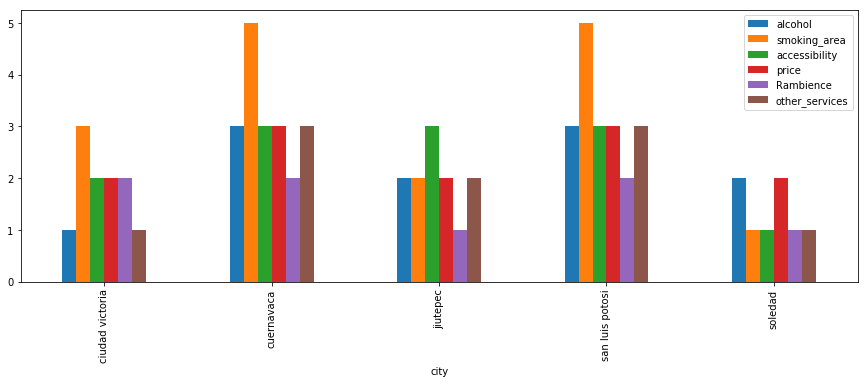

In [52]:
# Plot for facilities provided by Restaurants based on city.
F8newplt = F8new.groupby('city')['alcohol','smoking_area','accessibility','price','Rambience','other_services'].nunique().plot.bar(figsize=(15,5))

### T - rating_final.csv

In [53]:
T.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [54]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
userID            1161 non-null object
placeID           1161 non-null int64
rating            1161 non-null int64
food_rating       1161 non-null int64
service_rating    1161 non-null int64
dtypes: int64(4), object(1)
memory usage: 45.4+ KB


**Note : There is no missing values in any column of data**

In [56]:
#The total number of users who gave rating
n_user = len(T.userID.unique())
n_res = len(T.placeID.unique())
print("There are {} unique userID's in data.".format(n_user))
print("There are {} unique placeID's in data.".format(n_res))

There are 138 unique userID's in data.
There are 130 unique placeID's in data.


In [57]:
print(T['rating'].value_counts())

2    486
1    421
0    254
Name: rating, dtype: int64


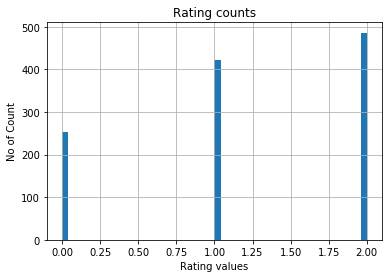

In [58]:
T['rating'].hist(bins=50)
plt.title('Rating counts')
plt.xlabel('Rating values')
plt.ylabel('No of Count')
plt.show()

# Data Cleaning

### Merging multiple files into one

In [62]:
# Merging rating_file(T) with user_profile(F7)
A=pd.merge(T,F7charLE)
# Merging A with user_payments(F6) 
B=pd.merge(A,F6_dum,how='left',on=['userID'])
# Merging B with user_cuisine(F5)
C=pd.merge(B,F5_dum,how='left',on=['userID'])
# Merging C with geo_places2(F8)
D=pd.merge(C,F8charLE,how='left',on=['placeID'])
# Merging D with chefmozparking(F4)
E=pd.merge(D,F4_dum,how='left',on=['placeID'])
# Merging E with chefmozcuisine(F2)
F=pd.merge(E,F2_dum,how='left',on=['placeID'])
# Merging F with chefmozaccepts(F1)
G=pd.merge(F,F1_dum,how='left',on=['placeID'])

In [63]:
len(G)

1161

In [64]:
G.head()

,userID,placeID,rating,food_rating,service_rating,smoker,drink_level,dress_preference,ambience,transport,...,Rpayment_Diners_Club,Rpayment_Discover,Rpayment_Japan_Credit_Bureau,Rpayment_MasterCard-Eurocard,Rpayment_VISA,Rpayment_Visa,Rpayment_bank_debit_cards,Rpayment_cash,Rpayment_checks,Rpayment_gift_certificates
0,U1077,135085,2,2,2,0,2,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,U1077,135038,2,2,1,0,2,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,U1077,132825,2,2,2,0,2,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,U1077,135060,1,2,2,0,2,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,U1077,135027,0,1,1,0,2,0,0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [65]:
G.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1160
Columns: 226 entries, userID to Rpayment_gift_certificates
dtypes: float64(81), int32(28), int64(6), object(1), uint8(110)
memory usage: 1.0+ MB


In [66]:
print('No of columns',G.shape[1])
print('No of rows',G.shape[0])

No of columns 226
No of rows 1161


In [67]:
# Check for Null values
G.isnull().values.any()

True

In [68]:
# Finding percentage of null values across columns
columns = G.columns
percent_missing = G.isnull().sum() * 100 / len(G)
missing_value_G = pd.DataFrame({'percent_missing': percent_missing})
missing_value_G

,percent_missing
userID,0.000000
placeID,0.000000
rating,0.000000
food_rating,0.000000
service_rating,0.000000
smoker,0.000000
drink_level,0.000000
dress_preference,0.000000
ambience,0.000000
transport,0.000000


In [69]:
# Replacing missing values with zero and check.
G = G.fillna(0)
G.isnull().values.any()

False

# Train/Test Split (75:25)

In [74]:
# splitting train and test data as 75/25.
X = G.drop(['placeID','rating','food_rating','service_rating'],axis=1)
y = G['rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [81]:
rating_final_df = pd.read_csv('rating_final.csv')
if not os.path.isfile('train.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df.iloc[:int(rating_final_df.shape[0]*0.75)].to_csv("train.csv", index=False)

if not os.path.isfile('test.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df.iloc[int(rating_final_df.shape[0]*0.75):].to_csv("test.csv", index=False)

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

### Basic statistics in train data

In [82]:
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of UsersID   :", len(np.unique(train_df.userID)))
print("Total No of PLaceID  :", len(np.unique(train_df.placeID)))

Training data 
--------------------------------------------------

Total no of ratings : 870
Total No of UsersID   : 112
Total No of PLaceID  : 127


### Basic statistics in test data

In [83]:
print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.userID)))
print("Total No of places  :", len(np.unique(test_df.placeID)))

Test data 
--------------------------------------------------

Total no of ratings : 291
Total No of Users   : 37
Total No of places  : 98


### Convert userID from str to int (Removing 'U') 

In [84]:
train_df['userID']  = train_df['userID'].str.lstrip('U').astype('int64')
test_df['userID']  = test_df['userID'].str.lstrip('U').astype('int64')

In [85]:
train_df.head()

,userID,placeID,rating,food_rating,service_rating
0,1077,135085,2,2,2
1,1077,135038,2,2,1
2,1077,132825,2,2,2
3,1077,135060,1,2,2
4,1068,135104,1,1,2


# Sparse Matrix Creation

### Creating sparse matrix from train data frame

In [88]:
from scipy import sparse
from scipy.sparse import csr_matrix

if os.path.isfile('train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.userID.values,
                                               train_df.placeID.values)),)
    
    print('Done. It\'s shape is : (user, place) : ',train_sparse_matrix.shape)
    print('Saving it into disk for further usage..')
    # save it into disk
    sparse.save_npz("train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')

We are creating sparse_matrix from the dataframe..
Done. It's shape is : (user, place) :  (1139, 135110)
Saving it into disk for further usage..
Done..



### Sparsity of trained matrix

In [89]:
us,mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()
print("Sparsity Of Train matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Train matrix : 99.99955292825817 % 


### Creating sparse matrix from test data frame

In [90]:
if os.path.isfile('test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.userID.values,
                                               test_df.placeID.values)))
    
    print('Done. It\'s shape is : (user, place) : ',test_sparse_matrix.shape)
    print('Saving it into disk for further usage..')
    # save it into disk
    sparse.save_npz("test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')

We are creating sparse_matrix from the dataframe..
Done. It's shape is : (user, place) :  (1138, 135110)
Saving it into disk for further usage..
Done..



### Sparsity of Test Matrix

In [92]:
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()
print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Test matrix : 99.99985756577438 % 


# Finding Global average of all restaurant ratings, Average rating per user, and Average rating per place

In [93]:
# Get the user averages in dictionary (key: user_id/place_id, value: avg rating)

def get_average_ratings(sparse_matrix, of_users):
    
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Place axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array 
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that restaurant or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR place..
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

### Finding global average of all restaurant ratings 

In [94]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 1.5392441860465116}

### Find average rating per user

In [95]:
train_averages['userID'] = get_average_ratings(train_sparse_matrix, of_users=True)

### Find average rating per place

In [96]:
train_averages['placeID'] =  get_average_ratings(train_sparse_matrix, of_users=False)

### PDF's and CDF's of avg ratings of users and places (train data)

C:\Users\Nalina Vadmal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



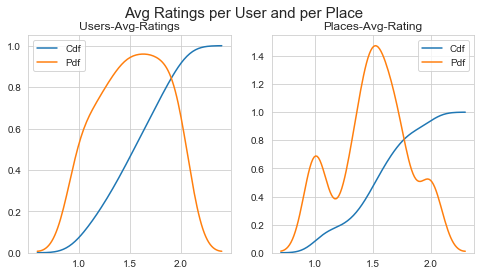

In [99]:
# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Place', fontsize=15)

ax1.set_title('Users-Avg-Ratings')
# get the list of average user ratings from the averages dictionary..
user_averages = [rat for rat in train_averages['userID'].values()]
sns.distplot(user_averages, ax=ax1, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(user_averages, ax=ax1, hist=False,label='Pdf')

ax2.set_title('Places-Avg-Rating')
# get the list of place_average_ratings from the dictionary..
place_averages = [rat for rat in train_averages['placeID'].values()]
sns.distplot(place_averages, ax=ax2, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(place_averages, ax=ax2, hist=False, label='Pdf')

plt.show()

# Cold start problem

### Cold Start Problem with Users

In [100]:
total_users = len(np.unique(rating_final_df.userID))
users_train = len(train_averages['userID'])
new_users = total_users - users_train

print('\nTotal number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn't appear in train data: {}({} %) \n ".format(new_users,
                                                                        np.round((new_users/total_users)*100, 2)))


Total number of Users  : 138

Number of Users in Train data : 102

No of Users that didn't appear in train data: 36(26.09 %) 
 


We might have to handle **new users (36)** who didn't appear in train data.

### Cold Start Problem with Places

In [101]:
total_places = len(np.unique(rating_final_df.placeID))
places_train = len(train_averages['placeID'])
new_places = total_places - places_train

print('\nTotal number of Places  :', total_places)
print('\nNumber of Users in Train data :', places_train)
print("\nNo of Places that didn't appear in train data: {}({} %) \n ".format(new_places,
                                                                        np.round((new_places/total_places)*100, 2)))


Total number of Places  : 130

Number of Users in Train data : 125

No of Places that didn't appear in train data: 5(3.85 %) 
 


We might have to handle **5 places** (small comparatively) in test data

# Algorithm implementation

In [103]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

In [116]:
reg_test_df = pd.read_csv('reg_test.csv', names = ['userID', 'placeID', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'PAvg', 'rating'], header=None)

### Utilitiy modules required for algorithm implementation

In [117]:
from surprise import Reader, Dataset

#Transforming train data

# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(reg_train[['userID', 'placeID', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset()


#Transforming test data
testset = list(zip(reg_test_df.userID.values, reg_test_df.placeID.values, reg_test_df.rating.values))
testset[:3]

[(1087, 132560, 1), (1065, 132561, 1), (1129, 132561, 1)]

In [121]:
##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

In [123]:
################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

In [124]:
##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    print('Training the model...')
    algo.fit(trainset)
    
    # ---------------- Evaluating train data--------------------#
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    
    # return two dictionaries train and test
    return train, test

### SVD Matrix Factorization with User Place interactions

In [125]:
from surprise import SVD

# Initialize the model
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Evaluating the model with train data..
---------------
Train Data
---------------
RMSE : 0.3317057152210434

MAPE : 22.63681248142635

adding train results in the dictionary..

Evaluating for test data...
---------------
Test Data
---------------
RMSE : 0.4948488837887633

MAPE : 36.75274725717257

storing the test results in test dictionary...

---------------------------------------------


### SVD Matrix Factorization with implicit feedback from user ( user rated places )

In [126]:
from surprise import SVDpp


# initiallize the model
svdpp = SVDpp(n_factors=50, random_state=15, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results

Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Evaluating the model with train data..
---------------
Train Data
---------------
RMSE : 0.3163017504304007

MAPE : 20.839048194283354

adding train results in the dictionary..

Evaluating for test data...
---------------
Test Data
---------------
RMSE : 0.5018114296611016

MAPE : 37.14511062221623

storing the test results in test dictionary...

---------------------------------------------


# Comparison and efficiency between the two models

In [127]:
# Saving our TEST_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_test).to_csv('small_sample_results.csv')
models = pd.read_csv('small_sample_results.csv', index_col=0)
models.loc['rmse'].sort_values()

svd      0.4948488837887633
svdpp    0.5018114296611016
Name: rmse, dtype: object